In [144]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np 
import plotly
import streamlit as st

In [145]:
a = float(input("Enter semi major axis (a): "))#7000 
e = float(input("Enter eccentricity (e): "))#0.01
v = float(input("Enter true anomaly in radians (v): "))#1
i = float(input("Enter inclination (i): "))#60

Enter semi major axis (a):  10000
Enter eccentricity (e):  0.1
Enter true anomaly in radians (v):  1
Enter inclination (i):  25


In [ ]:
#generating True anomaly (theta values) and calculating r(v)
v_range = np.linspace(0, 6.28, 200)
r = (a*(1-(e**2)))/(1+e*np.cos(v_range))
position = (a*(1-(e**2)))/(1+e*np.cos(v))
lim = a*1.5
if e>0.45:
    lim = a*2

#converting from polar to Cartesian
x = r * np.cos(v_range)
y = r * np.sin(v_range)

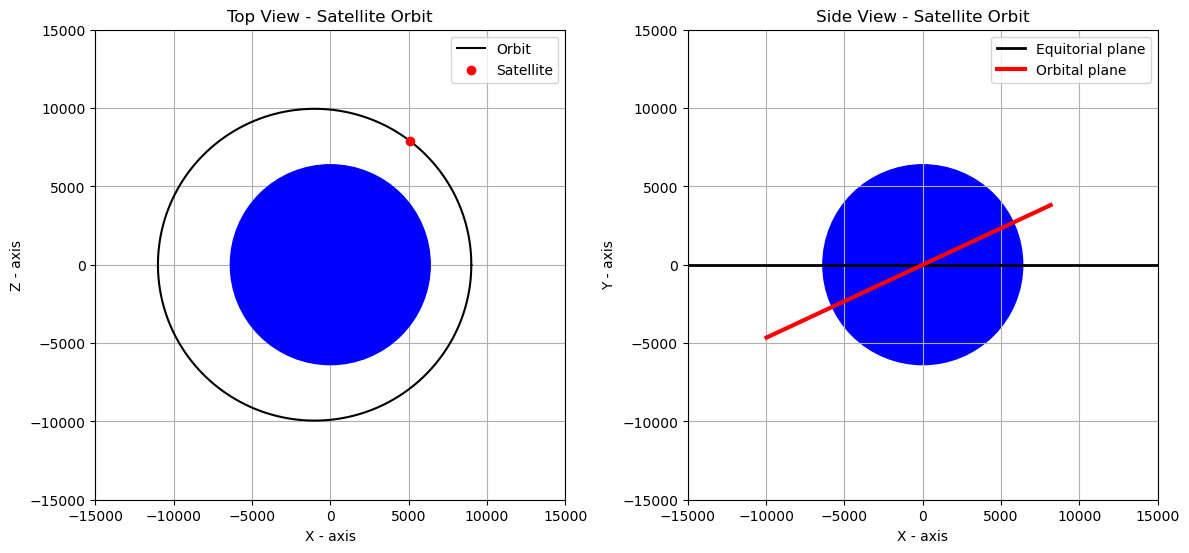

In [152]:
#Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

#adding title, label, and grid
ax1.set_title("Top View - Satellite Orbit")
ax1.set_xlabel('X - axis')
ax1.set_ylabel('Z - axis')
ax1.grid(True)
ax1.set_axisbelow(True)


# Create a circle patch for Earth at the origin with radius 6378 km
earth1 = patches.Circle((0, 0), radius=6378, color='blue', fill=True)
ax1.add_patch(earth1)
ax1.set_aspect('equal')
ax1.set_xlim(-lim,lim)
ax1.set_ylim(-lim,lim)

#plotting the orbit
ax1.plot(x,y,color = "black",label='Orbit', zorder=1)

#plotting the Satellite
x_orbit = position * np.cos(v)
y_orbit = position * np.sin(v)
ax1.scatter(x_orbit, y_orbit, color='Red', label='Satellite')

ax1.legend()
ax1.legend(loc='upper right')





ax2.set_title('Side View - Satellite Orbit')
ax2.set_xlabel('X - axis')
ax2.set_ylabel('Y - axis')
ax2.grid(True)

earth1 = patches.Circle((0, 0), radius=6378, color='blue', fill=True)
ax2.add_patch(earth1)
ax2.set_aspect('equal')
ax2.set_xlim(-lim, lim)
ax2.set_ylim(-lim, lim)

length = lim
angle_rad = np.deg2rad(0)  # Inclination in radians
x0, y0 = 0, 0
x1 = length * np.cos(angle_rad)
y1 = length * np.sin(angle_rad)
x2 = -length * np.cos(angle_rad)
y2 = -length * np.sin(angle_rad)
ax2.plot([x2, x1], [y2, y1], color='black', linewidth=2, label='Equitorial plane')

perigee = a*(1+e)
apogee = a*(1-e)
angle_rad = np.deg2rad(i)  # Inclination in radians
x1 = apogee * np.cos(angle_rad)
y1 = apogee * np.sin(angle_rad)
x2 = -perigee * np.cos(angle_rad)
y2 = -perigee * np.sin(angle_rad)
ax2.plot([x2, x1], [y2, y1], color='red', linewidth=3, label='Orbital plane')

ax2.legend()
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()